<B/> <span style="font-family:Castellar; font-size:2em;"><font color="Blue"/>Problem Statement

<B/> <span style="font-family:Lucida Bright; font-size:1.15em;"><font color="purple"/>In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:# President Franklin D. Roosevelt in 1941 # President John F. Kennedy in 1961# President Richard Nixon in 1973

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Load the Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import random
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS #calling WordCloud and Stopwords
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize #word tokenizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\neethu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Read the text

In [2]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\neethu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
from nltk.corpus import inaugural

In [4]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
print(len(inaugural.fileids()))

58


In [6]:
names=inaugural.fileids()
names

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [7]:
names[0],names[57]

('1789-Washington.txt', '2017-Trump.txt')

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>1941 - Roosevelt

In [8]:
names[38]

'1941-Roosevelt.txt'

In [9]:
#inaugural.raw('1941-Roosevelt.txt')

In [10]:
inaugural.raw(fileids=names[38])

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [11]:
words=list(inaugural.words(fileids=names[38]))
words

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in'

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Length of the passage

In [12]:
len(words)

1536

In [13]:
from nltk import FreqDist

In [14]:
fdist1 = FreqDist(words)# Counting Words Appearing in a Text (a frequency distribution)
fdist1

FreqDist({'the': 104, 'of': 81, ',': 77, '.': 67, 'and': 44, 'to': 35, 'in': 30, 'a': 29, '--': 25, 'is': 24, ...})

In [15]:
fdist1.hapaxes()[:20]#words that occur only once

['On',
 'inauguration',
 'since',
 'renewed',
 'dedication',
 'weld',
 'Lincoln',
 'preserve',
 'save',
 'institutions',
 'without',
 'To',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'recall',
 'place',
 'rediscover']

In [16]:
#finding words that characterize a text, relatively long, and occur frequently

fdist = FreqDist(words)

sorted([w for w in set(words) if len(w) > 7 and fdist[w] > 7])

['democracy']

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Frequent words

In [17]:
nltk.FreqDist(words).most_common(15)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24),
 ('that', 22),
 ('we', 22),
 ('it', 15),
 ('our', 14),
 ('It', 13)]

In [18]:
from nltk.text import Text
Text(inaugural.words()).concordance("nation")

Displaying 25 of 316 matches:
 to the character of an independent nation seems to have been distinguished by
f Heaven can never be expected on a nation that disregards the eternal rules o
first , the representatives of this nation , then consisting of little more th
, situation , and relations of this nation and country than any which had ever
, prosperity , and happiness of the nation I have acquired an habitual attachm
an be no spectacle presented by any nation more pleasing , more noble , majest
party for its own ends , not of the nation for the national good . If that sol
tures and the people throughout the nation . On this subject it might become m
if a personal esteem for the French nation , formed in a residence of seven ye
f our fellow - citizens by whatever nation , and if success can not be obtaine
y , continue His blessing upon this nation and its Government and give it all 
powers so justly inspire . A rising nation , spread over a wide and fruitful l
ing now decided by the

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Stopwords

In [19]:
from nltk.corpus import stopwords
import re

In [20]:
frequent_words = list(set(words)) # removes duplicates
frequent_words.sort()
print(frequent_words)

['"', "'", ',', '-', '--', '.', '."', '1789', '1941', '48', ':', ';', 'A', 'Address', 'America', 'American', 'Americans', 'Americas', 'And', 'As', 'Bill', 'But', 'Capital', 'Charta', 'Compact', 'Constitution', 'Declaration', 'Democracy', 'Eight', 'For', 'Gettysburg', 'God', 'Government', 'I', 'If', 'In', 'Independence', 'It', 'Its', 'Lincoln', 'Lives', 'Magna', 'Mayflower', 'Most', 'Nation', 'New', 'On', 'President', 'Prophets', 'Republic', 'Rights', 'Sometimes', 'States', 'That', 'The', 'There', 'These', 'Those', 'To', 'United', 'Washington', 'We', 'Without', 'World', 'a', 'achieve', 'across', 'acted', 'action', 'advanced', 'ages', 'ago', 'alert', 'alien', 'all', 'almost', 'alone', 'also', 'an', 'ancient', 'and', 'anew', 'are', 'artificial', 'as', 'aspiration', 'at', 'away', 'be', 'because', 'become', 'been', 'before', 'believe', 'believed', 'below', 'better', 'blazed', 'body', 'boldly', 'born', 'branches', 'brought', 'build', 'built', 'but', 'by', 'calls', 'came', 'cannot', 'capable'

In [21]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
processed_features = []
for sentence in range(0, len(words)):
      # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(words[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [23]:
processed_features[10]

'people'

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neethu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Word Cloud

In [25]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list
            comment_words = ' ' #empty string

            stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

In [26]:
print(word_tokens) 
print(filtered_sentence) 

[]
['national', 'day', 'inauguration', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 's', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 's', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'will', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'f

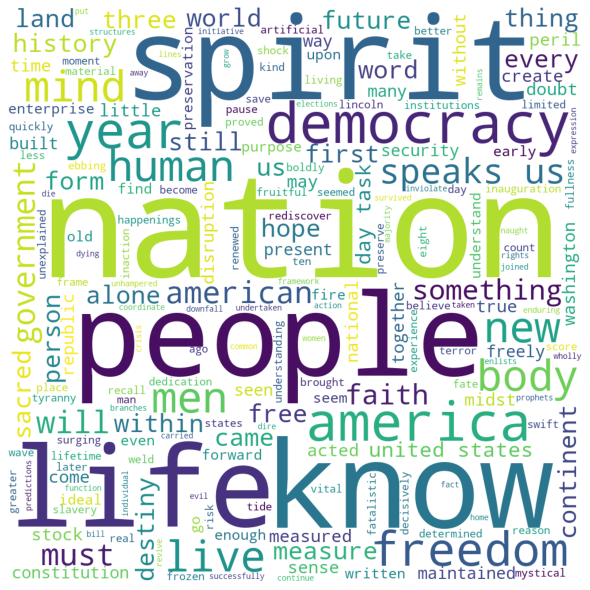

In [27]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>1961 Kennedy

In [28]:
names[43]

'1961-Kennedy.txt'

In [29]:
inaugural.raw(fileids=names[43])

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [30]:
words=list(inaugural.words(fileids=names[43]))
words

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Length of the words

In [31]:
len(words)

1546

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Common words

In [32]:
fdist1 = FreqDist(words)# Counting Words Appearing in a Text (a frequency distribution)
fdist1

FreqDist({',': 85, 'the': 83, 'of': 65, '.': 51, 'to': 38, 'and': 37, 'a': 29, 'we': 27, '--': 25, 'in': 24, ...})

In [33]:
fdist1.hapaxes()[:20]#words that occur only once

['Johnson',
 'Speaker',
 'Chief',
 'Justice',
 'Eisenhower',
 'Nixon',
 'Truman',
 'reverend',
 'clergy',
 'observe',
 'victory',
 'party',
 'celebration',
 'symbolizing',
 'end',
 'beginning',
 'signifying',
 'renewal',
 'change',
 'sworn']

In [34]:
fdist = FreqDist(words)

sorted([w for w in set(words) if len(w) > 7 and fdist[w] > 7])

[]

In [35]:
nltk.FreqDist(words).most_common(15)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24),
 ('our', 21),
 ('that', 20),
 ('not', 19),
 ('for', 13),
 ('us', 12)]

In [36]:
nltk.FreqDist(words)

FreqDist({',': 85, 'the': 83, 'of': 65, '.': 51, 'to': 38, 'and': 37, 'a': 29, 'we': 27, '--': 25, 'in': 24, ...})

In [37]:
frequent_words = list(set(words)) # removes duplicates
frequent_words.sort()
print(frequent_words)

['"', "'", ',', '-', '--', '.', '."', '...', '000', '1', '100', ':', ';', '?', 'Administration', 'All', 'Almighty', 'America', 'Americans', 'Americas', 'And', 'But', 'Can', 'Chief', 'Communists', 'Divided', 'East', 'Eisenhower', 'Finally', 'For', 'God', 'Hemisphere', 'His', 'I', 'If', 'In', 'Isaiah', 'Johnson', 'Justice', 'Let', 'Mr', 'My', 'Nation', 'Nations', 'Nixon', 'Nor', 'North', 'Now', 'President', 'Since', 'So', 'South', 'Speaker', 'States', 'The', 'This', 'To', 'Together', 'Truman', 'United', 'Vice', 'We', 'West', 'Will', 'With', 'a', 'abolish', 'absolute', 'accidental', 'across', 'adversary', 'again', 'against', 'age', 'aggression', 'ago', 'alarmed', 'alike', 'all', 'alliance', 'allies', 'alter', 'always', 'an', 'ancient', 'and', 'anew', 'answered', 'any', 'anywhere', 'are', 'area', 'arms', 'around', 'arts', 'as', 'ask', 'asking', 'assembly', 'assist', 'assure', 'asunder', 'at', 'atom', 'away', 'back', 'balance', 'battle', 'be', 'beachhead', 'bear', 'because', 'become', 'beco

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Stop words

In [38]:
processed_features = []
for sentence in range(0, len(words)):
      # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(words[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [39]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list
            comment_words = ' ' #empty string

            stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

In [40]:
print(word_tokens) 
print(filtered_sentence) 

[]
['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'now', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'temper

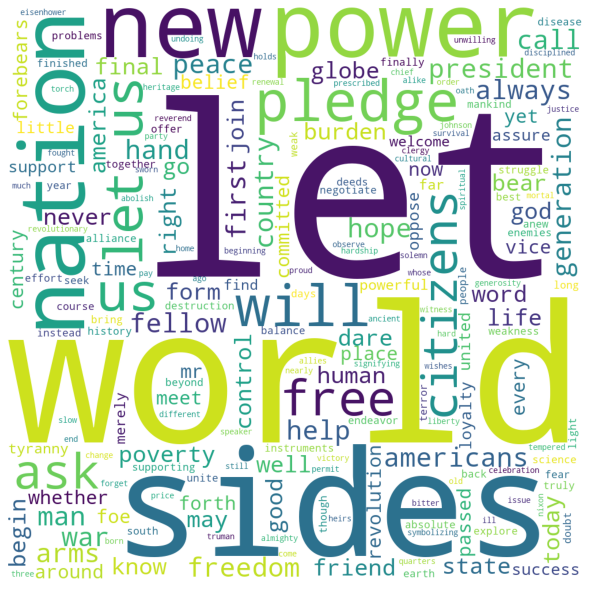

In [41]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>1973 Nixon

In [42]:
names[46]

'1973-Nixon.txt'

In [43]:
words=list(inaugural.words(fileids=names[46]))
words

['Mr',
 '.',
 'Vice',
 'President',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs',
 '.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

In [44]:
inaugural.raw(fileids=names[46])

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Length of the words

In [45]:
len(words)

2028

In [46]:
fdist1 = FreqDist(words)# Counting Words Appearing in a Text (a frequency distribution)
fdist1

FreqDist({',': 96, 'the': 80, '.': 68, 'of': 68, 'to': 65, 'in': 54, 'and': 47, 'we': 38, 'a': 34, 'that': 32, ...})

In [47]:
fdist1.hapaxes()[:20]#words that occur only once

['Vice',
 'President',
 'Speaker',
 'Chief',
 'Justice',
 'Senator',
 'Cook',
 'Mrs',
 'Eisenhower',
 'my',
 'fellow',
 'citizens',
 'good',
 'When',
 'met',
 'ago',
 'bleak',
 'depressed',
 'prospect',
 'seemingly']

In [48]:
fdist = FreqDist(words)

sorted([w for w in set(words) if len(w) > 7 and fdist[w] > 7])

['responsibility']

In [49]:
nltk.FreqDist(words).most_common(15)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32),
 ('for', 32),
 ('our', 31),
 ('us', 26),
 ('America', 21),
 ('as', 20)]

In [50]:
frequent_words = list(set(words)) # removes duplicates
frequent_words.sort()
print(frequent_words)

['"', "'", ',', '-', '--', '.', '."', '1972', '200th', ':', ';', '?', 'A', 'Above', 'Abroad', 'America', 'American', 'And', 'As', 'At', 'Because', 'But', 'By', 'Chief', 'Cook', 'Eisenhower', 'From', 'God', 'Government', 'His', 'How', 'I', 'II', 'In', 'It', 'Just', 'Justice', 'Let', 'Moscow', 'Mr', 'Mrs', 'Nation', 'National', 'Our', 'Peking', 'President', 'Senator', 'So', 'Speaker', 'That', 'The', 'This', 'Today', 'Together', 'Unless', 'Vice', 'War', 'Washington', 'We', 'When', 'World', 'Your', 'a', 'able', 'about', 'abroad', 'abundance', 'accept', 'act', 'adopted', 'advantage', 'affairs', 'again', 'age', 'aggression', 'ago', 'ahead', 'all', 'also', 'always', 'am', 'among', 'an', 'and', 'anniversary', 'another', 'answer', 'any', 'are', 'arms', 'as', 'ashamed', 'ask', 'asked', 'at', 'attempting', 'away', 'base', 'be', 'beacon', 'bear', 'because', 'become', 'been', 'before', 'began', 'beginnings', 'beset', 'best', 'better', 'between', 'beyond', 'birthday', 'birthright', 'bleak', 'bold', 

In [51]:
processed_features = []
for sentence in range(0, len(words)):
      # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(words[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Stop Words

In [52]:
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list
            comment_words = ' ' #empty string

            stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string
          
            
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

In [53]:
print(word_tokens) 
print(filtered_sentence) 

[]
['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'us', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'will', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'will', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far', 'reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able',

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Word Cloud

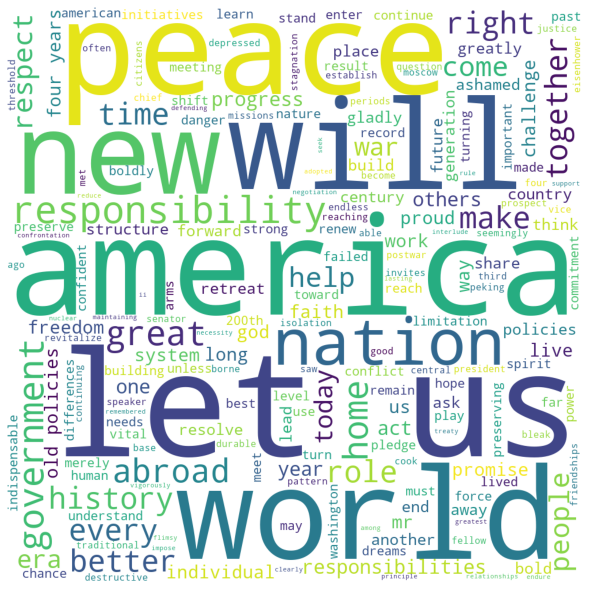

In [54]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

<B/><span style="font-family:Lucida Bright; font-size:1.3em;"><font color="orange"/>Unique words

In [55]:
import nltk
from nltk import word_tokenize
import re

In [56]:
early_list = inaugural.fileids()[:10]

In [57]:
recent_list = inaugural.fileids()[-10:]

In [58]:
for text in early_list:
    word_list = inaugural.words(text)
    # Below is our "list comprehension":
    word_list = [w.lower() for w in word_list]  # handle the case sensitivity
    unique_words = len(set(word_list))
    # In Python you can concatenate text with plus signs.  I turn the number of unique words
    # into a string before concatenating it to the rest.
    print ("For text " + text + ", the number of unique words is", str(unique_words))

For text 1789-Washington.txt, the number of unique words is 604
For text 1793-Washington.txt, the number of unique words is 95
For text 1797-Adams.txt, the number of unique words is 803
For text 1801-Jefferson.txt, the number of unique words is 687
For text 1805-Jefferson.txt, the number of unique words is 783
For text 1809-Madison.txt, the number of unique words is 526
For text 1813-Madison.txt, the number of unique words is 524
For text 1817-Monroe.txt, the number of unique words is 987
For text 1821-Monroe.txt, the number of unique words is 1213
For text 1825-Adams.txt, the number of unique words is 972


In [59]:
for text in recent_list:
    word_list = inaugural.words(text)
    # Below is our "list comprehension":
    word_list = [w.lower() for w in word_list]  # handle the case sensitivity
    unique_words = len(set(word_list))
    # In Python you can concatenate text with plus signs.  I turn the number of unique words
    # into a string before concatenating it to the rest.
    print ("For text " + text + ", the number of unique words is", str(unique_words))

For text 1981-Reagan.txt, the number of unique words is 855
For text 1985-Reagan.txt, the number of unique words is 876
For text 1989-Bush.txt, the number of unique words is 754
For text 1993-Clinton.txt, the number of unique words is 604
For text 1997-Clinton.txt, the number of unique words is 727
For text 2001-Bush.txt, the number of unique words is 593
For text 2005-Bush.txt, the number of unique words is 742
For text 2009-Obama.txt, the number of unique words is 900
For text 2013-Obama.txt, the number of unique words is 792
For text 2017-Trump.txt, the number of unique words is 547


In [60]:
import pandas as pd
text_data = pd.DataFrame(columns = ['filename','year','length','unique'])
for file in inaugural.fileids():
    word_list = inaugural.words(file)
    word_list = [w.lower() for w in word_list]  # handle the case sensitivity
    this_file = pd.DataFrame(data = {"filename":[file], \
                                     "year" : [int(file[:4])], \
                                     "length" : [len(word_list)], \
                                     "unique" : [len(set(word_list))]})
    text_data = text_data.append(this_file, ignore_index=True)
   

In [61]:
 text_data

,filename,year,length,unique
0,1789-Washington.txt,1789,1538,604
1,1793-Washington.txt,1793,147,95
2,1797-Adams.txt,1797,2585,803
3,1801-Jefferson.txt,1801,1935,687
4,1805-Jefferson.txt,1805,2384,783
5,1809-Madison.txt,1809,1265,526
6,1813-Madison.txt,1813,1304,524
7,1817-Monroe.txt,1817,3693,987
8,1821-Monroe.txt,1821,4909,1213
9,1825-Adams.txt,1825,3150,972
